In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

from scipy import stats

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [3]:
#read in data
housing = pd.read_csv("ames_house_cleaned.csv")
housing.head()

,Unnamed: 0,PID,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,SaleType,SaleCondition,NumbrFlrs,HouseAge,Remodeled,LogPrice,AllBathrooms,TotalLivArea,TotalOutdoorSF,HasPool
0,1,909176150,126000,1-STORY 1945 & OLDER,RL,60,7890,2,0,4,...,Warranty Deed,Normal,1,71,1,11.744037,2.0,1094,166,0
1,2,905476230,139500,1-STORY PUD 1946 & NEWER,RL,42,4235,2,0,4,...,Warranty Deed,Normal,1,26,0,11.845820,3.0,1994,105,0
2,3,911128020,124900,1-STORY 1945 & OLDER,C (all),60,6060,2,0,4,...,Warranty Deed,Normal,1,80,1,11.735269,1.0,1738,282,0
3,4,535377150,114000,2-STORY 1945 & OLDER,RL,80,8146,2,0,4,...,Warranty Deed,Normal,2,110,1,11.643954,1.0,1039,279,0
4,5,534177230,227000,2-STORY 1946 & NEWER,RL,70,8400,2,0,4,...,Warranty Deed,Normal,2,9,0,12.332705,3.5,2308,45,0


In [4]:
housing.drop(['Unnamed: 0'],inplace=True, axis=1)

In [5]:
housing.columns

Index(['PID', 'SalePrice', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtUnfSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition', 'NumbrFlrs', 'HouseAge',
       'Remodeled', 'Lo

<AxesSubplot:>

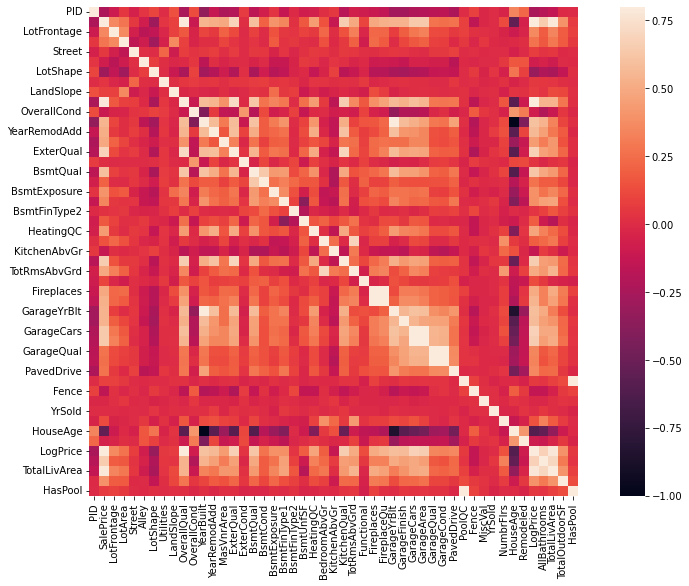

In [6]:
#correlation matrix
corr = housing.corr()
f, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(corr, vmax=.8, square=True)

In [7]:
lm = LinearRegression()
price = housing.SalePrice
log_price = housing.LogPrice
X = housing[[
    'TotalLivArea','GarageArea','BsmtUnfSF','TotalOutdoorSF',
    'LotArea','LotFrontage','TotRmsAbvGrd','MSSubClass','MSZoning',
    'OverallQual','OverallCond','BsmtQual','ExterQual',
    'Neighborhood','KitchenQual','FireplaceQu','GarageFinish',
    'SaleCondition','YrSold','CentralAir','GarageCars','AllBathrooms',
    'HouseAge','YearBuilt','YearRemodAdd','GarageYrBlt','LotShape'
]]

In [11]:
feats_to_encode = set(X.columns[X.dtypes==object])

In [12]:
X_feats = list(feats_to_encode.intersection(set(X.columns)))


In [13]:
#get dummies for cat
# Dummify categorical features from all features selected for our model
X = pd.get_dummies(X, prefix=X_feats ,columns=X_feats, drop_first=True)
X.head()

,TotalLivArea,GarageArea,BsmtUnfSF,TotalOutdoorSF,LotArea,LotFrontage,TotRmsAbvGrd,OverallQual,OverallCond,BsmtQual,...,Neighborhood_Somerset,Neighborhood_Southwest of ISU,Neighborhood_Stone Brook,Neighborhood_Timberland,Neighborhood_Veenker,CentralAir_Y,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1094,399,618,166,7890,60,4,6,6,3,...,0,1,0,0,0,1,0,0,1,0
1,1994,266,104,105,4235,42,5,5,5,4,...,0,0,0,0,0,1,0,0,1,0
2,1738,216,100,282,6060,60,5,5,9,3,...,0,0,0,0,0,1,0,0,1,0
3,1039,281,405,279,8146,80,6,4,8,2,...,0,0,0,0,0,1,0,0,1,0
4,2308,528,167,45,8400,70,6,8,6,4,...,0,0,0,0,0,1,0,0,1,0


In [14]:
# NOTE: The VIFs in the R car package also give VIF by the degrees of freedom of the feature which is useful for
# dummified features with lots of categories
X_add_const = add_constant(X) # apparently, this is required for statsmodels
vif = pd.DataFrame()
vif['features'] = X_add_const.columns
vif['VIF'] = [variance_inflation_factor(X_add_const.values, i) for i in range(X_add_const.shape[1])]
vif


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,VIF
0,const,0.000000
1,TotalLivArea,5.293544
2,GarageArea,6.383767
3,BsmtUnfSF,2.317799
4,TotalOutdoorSF,1.356462
...,...,...
71,CentralAir_Y,1.496434
72,SaleCondition_Alloca,3.099066
73,SaleCondition_Family,10.031580
74,SaleCondition_Normal,53.159245


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, price, test_size=0.3, random_state=0)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, log_price, random_state=0, test_size=0.3)


In [29]:
'''
function to score input model based
on the train and test targets
''' 

def model_score(model):
    model.fit(X_train,y_train)
    print('Train Score: ', model.score(X_train,y_train))
    print('Test Score: ', model.score(X_test,y_test))

    

'''
function to score input model based on the 
log of the train and test targets
'''
def log_score(model):
    model.fit(X_train_log,y_train_log)
    print('Log Train Score: ', model.score(X_train_log,y_train_log))
    print('Log Test Score: ', model.score(X_test_log,y_test_log))

In [32]:
# Fit model
lm.fit(X=X_train, y=y_train)
y_predict_train = lm.predict(X_train)
y_predict_test = lm.predict(X_test)

model_score(lm)
log_score(lm)

Train Score:  0.9074684599865324
Test Score:  0.9104430388952001
Log Train Score:  0.9373670718313256
Log Test Score:  0.9338459386734144


In [33]:
#RMSE and log RMSE
rmse = np.sqrt(mean_squared_error(y_test,lm.predict(X_test)))
print(rmse)
log_rmse = np.sqrt(mean_squared_error(y_test_log,lm.predict(X_test_log)))
print(log_rmse)

190451.77074719727
0.0983339481173212


In [47]:
#lasso
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=1.0)
model_score(lasso_reg)
log_score(lasso_reg)

Train Score:  0.9074573030615094
Test Score:  0.9105384054974286
Log Train Score:  0.8285902775431411
Log Test Score:  0.8350376664565811


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 221756109861.79648, tolerance: 977913637.1182487
  model = cd_fast.enet_coordinate_descent(


In [44]:
#RMSE and log RMSE
rmse = np.sqrt(mean_squared_error(y_test,lasso_reg.predict(X_test)))
print(rmse)
log_rmse = np.sqrt(mean_squared_error(y_test_log,lasso_reg.predict(X_test_log)))
print(log_rmse)

190451.7814056648
0.15528074872759928


In [48]:
#ridge
from sklearn.linear_model import Ridge
#Fit the model
ridge_reg = Ridge(alpha=1.0)

model_score(ridge_reg)
log_score(ridge_reg)

Train Score:  0.9071197665486251
Test Score:  0.9098143369485101
Log Train Score:  0.936940827646434
Log Test Score:  0.9343910197175858


In [49]:
#RMSE and log RMSE
rmse = np.sqrt(mean_squared_error(y_test,ridge_reg.predict(X_test)))
print(rmse)
log_rmse = np.sqrt(mean_squared_error(y_test_log,ridge_reg.predict(X_test_log)))
print(log_rmse)

190451.77138069802
0.09792799542563393


In [52]:
#elastic net
from sklearn.linear_model import ElasticNet
el_reg = ElasticNet()

model_score(el_reg)
log_score(el_reg)

Train Score:  0.8697591852732471
Test Score:  0.8753032482963997
Log Train Score:  0.8439487950971399
Log Test Score:  0.849083399886529


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 695688498560.0444, tolerance: 977913637.1182487
  model = cd_fast.enet_coordinate_descent(


In [34]:
# Scale to compare coefficients via OLS
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [38]:
# Fit same model using statsmodels to see statistics
ols = sm.OLS(y_train, sm.add_constant(X_train_scaled))
ans = ols.fit()
print(ans.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     226.6
Date:                Fri, 21 Oct 2022   Prob (F-statistic):               0.00
Time:                        09:55:27   Log-Likelihood:                -20159.
No. Observations:                1761   AIC:                         4.047e+04
Df Residuals:                    1687   BIC:                         4.087e+04
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.798e+05    551.897    325.705      0.0

In [24]:
# Residuals
model_residuals_test = y_test - y_predict_test
model_residuals_test.describe()

count       755.000000
mean       1164.164436
std       23247.840111
min     -101811.063779
25%      -10675.682751
50%         165.155215
75%       13009.450463
max      154344.127356
Name: SalePrice, dtype: float64

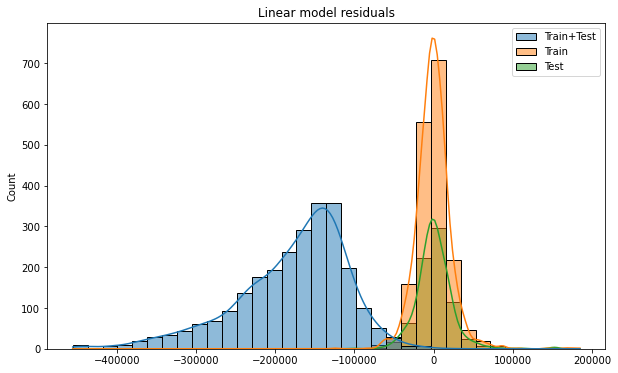

In [25]:
# Plot residuals
residuals_all = housing.LogPrice - lm.predict(X)
residuals_train = y_train - lm.predict(X_train)
residuals_test = y_test - lm.predict(X_test)
residuals = pd.DataFrame({"Train+Test": residuals_all, "Train": residuals_train, "Test": residuals_test})

fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(residuals, kde=True, ax=ax)
plt.title("Linear model residuals")
plt.show()

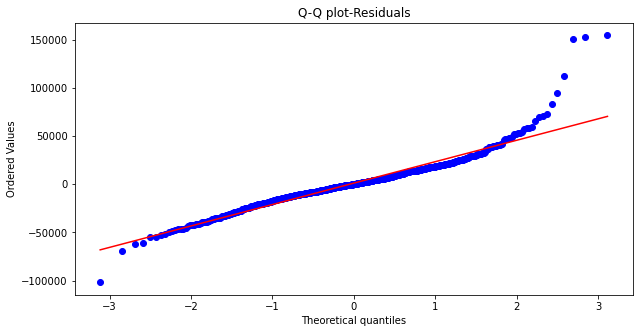

In [26]:
# Quantile-Quantile plot
stats.probplot(residuals_test, dist="norm", plot=plt)
plt.title("Q-Q plot-Residuals")
plt.show()

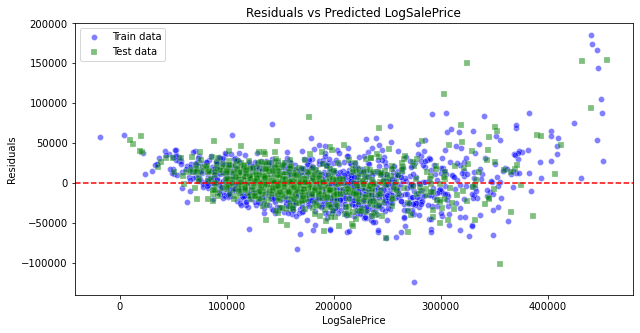

In [27]:
# Residuals vs Predicted LogSalePrice
sns.scatterplot(y=residuals_train, x=y_predict_train, color='blue', marker='o', alpha = 0.5, label="Train data")
sns.scatterplot(y=residuals_test, x=y_predict_test, color='green', marker='s', alpha=0.5, label="Test data")
plt.axhline(y=0, color="red", linestyle='--')
plt.title("Residuals vs Predicted LogSalePrice")
plt.ylabel("Residuals")
plt.xlabel("LogSalePrice")
plt.show()